In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from networkx.drawing.nx_agraph import graphviz_layout
import copy
import time
from IPython.display import display, clear_output, Markdown
import heapq

In [5]:
g = nx.Graph()

# Graph Vertices and Edges:

In [6]:
g.add_edge('Oradea', 'Zerind', weight=71)
g.add_edge('Oradea', 'Sibiu', weight=151)
g.add_edge('Zerind', 'Arad', weight=75)
g.add_edge('Arad', 'Sibiu', weight=140)
g.add_edge('Arad', 'Timisoara', weight=118)
g.add_edge('Timisoara', 'Lugoj', weight=111)
g.add_edge('Lugoj', 'Mehadia', weight=70)
g.add_edge('Mehadia', 'Drobeta', weight=75)
g.add_edge('Drobeta', 'Craiova', weight=120)
g.add_edge('Sibiu', 'Fagaras', weight=99)
g.add_edge('Sibiu', 'Rimnicu Vilcea', weight=80)
g.add_edge('Rimnicu Vilcea', 'Craiova', weight=146)
g.add_edge('Craiova', 'Pitesti', weight=138)
g.add_edge('Rimnicu Vilcea', 'Pitesti', weight=97)
g.add_edge('Fagaras', 'Bucharest', weight=211)
g.add_edge('Pitesti', 'Bucharest', weight=101)
g.add_edge('Bucharest', 'Urziceni', weight=85)
g.add_edge('Bucharest', 'Giurgiu', weight=90)
g.add_edge('Urziceni', 'Hirsova', weight=98)
g.add_edge('Hirsova', 'Eforie', weight=86)
g.add_edge('Urziceni', 'Vaslui', weight=92)
g.add_edge('Vaslui', 'Iasi', weight=92)
g.add_edge('Iasi', 'Neamt', weight=87)

In [38]:
starting_node = 'Arad'
end_node = 'Bucharest'

{'Oradea': {'weight': 151}, 'Arad': {'weight': 140}, 'Fagaras': {'weight': 99}, 'Rimnicu Vilcea': {'weight': 80}}
[['Oradea', 151], ['Arad', 140], ['Fagaras', 99], ['Rimnicu Vilcea', 80]]


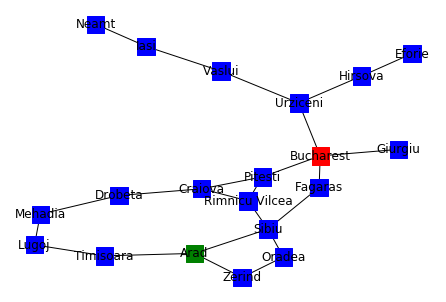

In [39]:

for node in g.nodes:
    nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False}})
    if node == starting_node:
        nx.set_node_attributes(g, {node: {'source': True}})
    if node == end_node:
        nx.set_node_attributes(g, {node: {'destination': True}})

print(g['Sibiu'])
print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
my_pos = nx.spring_layout(g, seed=10)
color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
nx.draw(g, pos=my_pos, with_labels=True,node_color=color_map, node_shape='s' )
plt.show()

# Debug : All nodes with their neighbours
# for k in g.nodes():
#     print(str(k) + " " + str(g[k]))

# Breadth First Search:

In [40]:
def bfs(graph, starting_point, end_point):
    explored = []
    end_point_found = None
    queue = [(starting_point,[])]
    total_nodes_visited = 0
    while queue or end_point_found:
        clear_output(wait=True) # Clear Output of each loop
        current_node, path = queue.pop(0)
#         print(current_node)
#         print('Queue State:')
#         print(queue)
#         print('Explored State:')
#         print(explored)
        if graph.nodes[current_node]['destination'] == True:
#             print('Total Nodes Visited : ' + str(total_nodes_visited))
#             print(explored)
            return path + [current_node]
        
        if current_node not in explored and graph.nodes[current_node]['traversed'] != True:
            total_nodes_visited += 1
            #print(node)
            #print(graph_arr[node[1]][node[0]])
            if graph.nodes[current_node]['source'] != True and graph.nodes[current_node]['destination'] != True:
                nx.set_node_attributes(graph, {current_node: {'traversed': True}})
#                 my_pos=graphviz_layout(graph,'dot')
                my_pos = nx.spring_layout(graph, seed=10)
                color_map = ['green' if graph.nodes[i]['source']==True else 'red' if graph.nodes[i]['destination']==True else 'yellow' if graph.nodes[i]['traversed']==True else 'blue' for i in graph.nodes]
                nx.draw(graph,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
                plt.show()
                time.sleep(0.15)
#             temp_color = visual_arr[node[1]][node[0]]
#             visual_arr[node[1]][node[0]] = "<span style='color:red'>" + graph_arr[node[1]][node[0]] + "</span>"
#             display(Markdown('<br>'.join(''.join(block for block in line) for line in visual_arr)))
#             
#             visual_arr[node[1]][node[0]] = "<span style='color:green'>" + graph_arr[node[1]][node[0]] + "</span>"
            
            explored.append(current_node)
            neighbours_with_weights = [[k,v['weight']] for k,v in graph[current_node].items() ]
            neighbors_sorted = sorted(neighbours_with_weights, key = lambda x:x[1])
            print(neighbors_sorted)
            for neighbour, weight in neighbors_sorted:
                if neighbour not in explored and g.nodes[current_node]['traversed'] != True:
                    queue.append((neighbour, path + [current_node]))
       
    print('End point Found : ' + str(end_point_found))
    print('Queue Empty : ' + str(queue))
    print('Total Nodes Visited : ' + str(total_nodes_visited))
    return None

['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Total Cost : 450


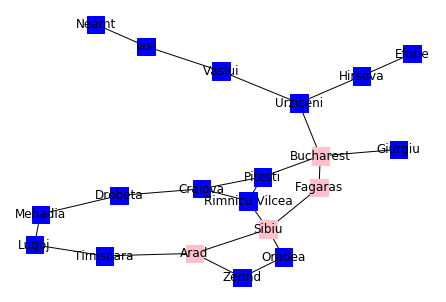

In [41]:
if starting_node not in list(g.nodes()) or end_node not in list(g.nodes()):
    print('Invalid Starting or end node')
else:

    for node in g.nodes:
        nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False}})
        if node == starting_node:
            nx.set_node_attributes(g, {node: {'source': True}})
        if node == end_node:
            nx.set_node_attributes(g, {node: {'destination': True}})

    print(g['Sibiu'])
    print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
    color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
    nx.draw(g, with_labels=True,node_color=color_map )
    plt.show()


    path = bfs(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node))
    print(path)
    cost = 0
    traverser = iter(path)
    current_node = next(traverser)
    while current_node != end_node:
    #     print(current_node)
        next_node = next(traverser)
        cost += g[current_node][next_node]['weight']
    #     print(cost)
        current_node = next_node
    print('Total Cost : ' + str(cost))
    bfs_path = path
    bfs_cost = cost

    if path != None:
        color_map = ['pink' if i in path else 'blue' for i in g.nodes]
        my_pos = nx.spring_layout(g, seed=10)
        nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
        plt.show()

# Uniform Cost Search:

In [42]:
class PriorityQueue:
        
        def __init__(self):
            self.elements = []
    
        def empty(self):
            return len(self.elements) == 0
        
        def not_empty(self):
            return not len(self.elements) == 0
        
        def push(self, item, priority):
            return heapq.heappush(self.elements, (priority, item))

        def pop(self):
            return heapq.heappop(self.elements)

In [43]:
def ucs(graph, starting_point, end_point):
    explored = []
    end_point_found = None
    queue = PriorityQueue()
    queue.push((starting_point,[]),0)
    total_nodes_visited = 0
    while queue.not_empty() or end_point_found:
        clear_output(wait=True) # Clear Output of each loop
        priority, (current_node, path) = queue.pop()
#         print(current_node)
#         print('Queue State:')
#         print(queue)
#         print('Explored State:')
#         print(explored)
        if graph.nodes[current_node]['destination'] == True:
#             print('Total Nodes Visited : ' + str(total_nodes_visited))
#             print(explored)
            print('Cost : ' + str(priority))
            return path + [current_node]
        
        if current_node not in explored and graph.nodes[current_node]['traversed'] != True:
            total_nodes_visited += 1
            #print(node)
            #print(graph_arr[node[1]][node[0]])
            if graph.nodes[current_node]['source'] != True and graph.nodes[current_node]['destination'] != True:
                nx.set_node_attributes(g, {current_node: {'traversed': True}})
#                 my_pos=graphviz_layout(graph,'dot')
                my_pos = nx.spring_layout(graph, seed=10)
                color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
                nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
                plt.show()
                time.sleep(0.15)
#             temp_color = visual_arr[node[1]][node[0]]
#             visual_arr[node[1]][node[0]] = "<span style='color:red'>" + graph_arr[node[1]][node[0]] + "</span>"
#             display(Markdown('<br>'.join(''.join(block for block in line) for line in visual_arr)))
#             
#             visual_arr[node[1]][node[0]] = "<span style='color:green'>" + graph_arr[node[1]][node[0]] + "</span>"
            
            explored.append(current_node)
            for neighbour, v in g[current_node].items():
                if neighbour not in explored and graph.nodes[current_node]['traversed'] != True:
                    queue.push((neighbour, path + [current_node]),priority + v['weight'])
       
    print('End point Found : ' + str(end_point_found))
    print('Queue Empty : ' + str(queue))
    print('Total Nodes Visited : ' + str(total_nodes_visited))
    return None

Cost : 418
['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Total Cost : 418


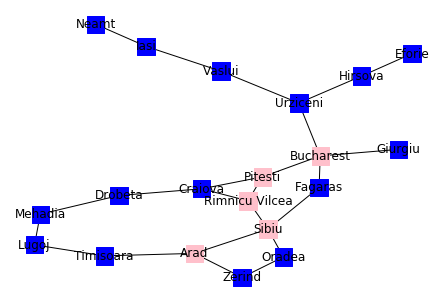

In [44]:
if starting_node not in list(g.nodes()) or end_node not in list(g.nodes()):
    print('Invalid Starting or end node')
else:
    for node in g.nodes:
        nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False}})
        if node == starting_node:
            nx.set_node_attributes(g, {node: {'source': True}})
        if node == end_node:
            nx.set_node_attributes(g, {node: {'destination': True}})

    print(g['Sibiu'])
    print([[k,v['weight']] for k,v in g['Sibiu'].items() ])
    color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'blue' for i in g.nodes]
    nx.draw(g, with_labels=True,node_color=color_map )
    plt.show()


    path = ucs(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node))
    print(path)
    cost = 0
    traverser = iter(path)
    current_node = next(traverser)
    while current_node != end_node:
    #     print(current_node)
        next_node = next(traverser)
        cost += g[current_node][next_node]['weight']
    #     print(cost)
        current_node = next_node
    print('Total Cost : ' + str(cost))
    ucs_path = path
    ucs_cost = cost
    if path != None:
        color_map = ['pink' if i in path else 'blue' for i in g.nodes]
        my_pos = nx.spring_layout(g, seed=10)
        nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
        plt.show()

# Greedy Best First Search:

In [48]:
def gbfs(graph, start_node, end_node, heuristics):
        pqueue = PriorityQueue()
        
        pqueue.push((start_node, []), 0) # Inititial point and priority
        flag = False
        explored = []
        while not pqueue.empty():
            clear_output(wait=True)
#             print(pqueue.elements)
            
            priority, (current_node, path) = pqueue.pop()
            if graph.nodes[current_node]['examined'] == True:
                break
            print(current_node)
            if graph.nodes[current_node]['destination'] == True or flag:
                return path + [current_node], priority
                break
            else:
                for neighbour, v in g[current_node].items():
                    if neighbour in explored:
                        continue
#                     print('We stuck here')
                    if graph.nodes[neighbour]['traversed'] != True:
                        nx.set_node_attributes(g, {neighbour: {'traversed': True}})
                        
                        h = heuristics[neighbour]
                        
                        if graph.nodes[current_node]['destination'] == True:
                            flag= True
                            break
                        
                        

                        
                        explored.append(neighbour)
                        pqueue.push((neighbour, path + [current_node]), h)
                        
                        
              
                nx.set_node_attributes(g, {current_node: {'examined': True}})          
#                 current.mark_examined()
                  # Visualization
                 
#                         print(str(neighbor.position) + str(neighbor.visit_count))
#                 my_pos = nx.spring_layout(graph, seed=10)
#                 color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
#                 nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
#                 plt.show()
                    # Visualization
#                 clear_output(wait=True) 
                my_pos = nx.spring_layout(graph, seed=10)
                color_map = ['green' if g.nodes[i]['source']==True else 'red' if g.nodes[i]['destination']==True else 'yellow' if g.nodes[i]['traversed']==True else 'blue' for i in g.nodes]
                nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
                plt.show()
                time.sleep(0.30)
                
            

In [49]:
heuristics_table = {
    'Arad' :366,'Mehadia':241,
    'Bucharest':0,'Neamt':234,
    'Craiova':160,'Oradea':380,
    'Drobeta':242,'Pitesti':100,
    'Eforie':161,'Rimnicu Vilcea':193,
    'Fagaras':176,'Sibiu':253,
    'Iasi':226,'Vaslui':199,
    'Lugoj':244,'Zerind':374,
    'Giurgiu':77,'Timisoara':329,
    'Hirsova':151,'Urziceni':80,
    
}

Bucharest
['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Total edge Cost : 450


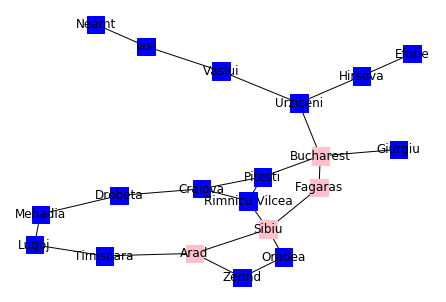

In [51]:
if starting_node not in list(g.nodes()) or end_node not in list(g.nodes()):
    print('Invalid Starting or end node')
else:
    for node in g.nodes:
        nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False, 'examined':False}})
        if node == starting_node:
            nx.set_node_attributes(g, {node: {'source': True}})
        if node == end_node:
            nx.set_node_attributes(g, {node: {'destination': True}})

    path, total_cost = gbfs(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node), heuristics_table)
    print(path)
#     print('Heuristic total Cost : ' + str(total_cost) )
    cost = 0
    traverser = iter(path)
    current_node = next(traverser)
    while current_node != end_node:
    #     print(current_node)
        next_node = next(traverser)
        cost += g[current_node][next_node]['weight']
    #     print(cost)
        current_node = next_node
    print('Total edge Cost : ' + str(cost))
    gbfs_path = path
    gbfs_cost = cost
    if path != None:
        color_map = ['pink' if i in path else 'blue' for i in g.nodes]
        my_pos = nx.spring_layout(g, seed=10)
        nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
        plt.show()

# Iterative Deepening Depth First Search (IDDFS)

In [52]:
CUTOFF = 1000
def rdls(graph, current_node, end_node, depth_limit, path): # Recursive Depth Limited search
    print('Depth : ' + str(depth_limit))
    print('Current Node : ' + current_node)
    
    if graph.nodes[current_node]['destination'] == True:
        return {'goal':current_node, 'current_node':current_node, 'depth':depth_limit, 'status':True, 'message':'Goal Reached', 'cutoff':True, 'path':path}
    elif depth_limit == 0:
        return {'goal':None, 'current_node':current_node, 'depth':depth_limit, 'status':False, 'message':'Max Allowed Depth Reached ' + str(depth_limit), 'cutoff':False, 'path':path}
    cutoff_occured = False
#     if graph.nodes[current_node]['traversed'] == True:
#         return {'goal':None, 'current_node':current_node, 'depth':depth_limit, 'status':False, 'message':'Already Traversed' , 'cutoff':False}
    print(graph[current_node].items())
    for neighbour, v in graph[current_node].items():
        
        if neighbour in path:
            print(neighbour +' is already Traversed in ' + str(path))
            continue
        
        clear_output(wait=True) 
        nx.set_node_attributes(graph, {neighbour: {'traversed': True}})
        my_pos = nx.spring_layout(graph, seed=10)
        colors = ['yellow', 'purple', 'orange', 'pink', 'grey', 'brown']
        color_map = ['green' if graph.nodes[i]['source']==True else 'red' if graph.nodes[i]['destination']==True else colors[depth_limit%6] if i in path+[neighbour] else 'blue' for i in graph.nodes]
        nx.draw(g,pos = my_pos, with_labels=True,node_color=color_map, node_shape='s')
        plt.show()
        time.sleep(0.15)
        
            
#         print('Going inside ' + neighbour)
        result = rdls(graph, neighbour, end_node, depth_limit - 1, path + [neighbour])
#         print('Returning ' + str(result))
        if result['cutoff'] == True:
            cutoff_occured = True
        if result['status'] == True:
            return result
    if cutoff_occured :
#         print('IDK What to do here')
        return result
    
    return {'goal':None, 'current_node':current_node, 'depth':depth_limit, 'status':False, 'message':'Nothing found' + str(depth_limit), 'cutoff':False, 'path':path}
        
def dls(graph, start_node, end_node, depth_limit, path): # Depth Limited Search
    return rdls(graph, start_node, end_node, depth_limit, path)
    

In [53]:
def iddfs(graph, start_node, end_node):
#     Max Depth is number of nodes if all nodes are linked 
    max_depth = len(graph.nodes())
    print('MAX DEPTH : ' + str(max_depth))
    
    for node in g.nodes:
        nx.set_node_attributes(g, {node: {'visited': False, 'source': False, 'destination': False, 'traversed': False, 'examined':False}})
        if node == starting_node:
            nx.set_node_attributes(g, {node: {'source': True}})
        if node == end_node:
            nx.set_node_attributes(g, {node: {'destination': True}})
    
    iterations = 0
    
    for i in range(1,max_depth + 1 ):
        print('Depth level' + str(i))
        nx.set_node_attributes(graph, {start_node: {'traversed': True}})
        result = dls(copy.deepcopy(g), copy.deepcopy(starting_node), copy.deepcopy(end_node), depth_limit = i, path=[start_node])
        if result['status'] == True:
            iterations = i
            break
    
    return (result['path'], iterations)
    

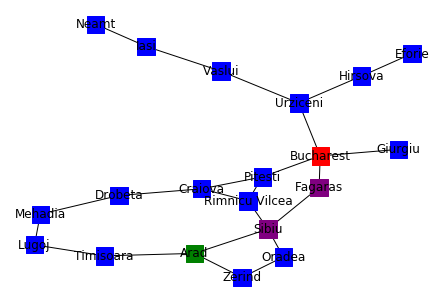

Depth : 0
Current Node : Bucharest
['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Goal Depth :3
Total edge Cost : 450


In [55]:
if starting_node not in list(g.nodes()) or end_node not in list(g.nodes()):
    print('Invalid Starting or end node')
else:

    path, iterations = iddfs(copy.deepcopy(g), starting_node, end_node)
    print(path)
    print("Goal Depth :" + str(iterations))

    cost = 0
    traverser = iter(path)
    current_node = next(traverser)
    while current_node != end_node:
    #     print(current_node)
        next_node = next(traverser)
        cost += g[current_node][next_node]['weight']
    #     print(cost)
        current_node = next_node
    print('Total edge Cost : ' + str(cost))
    iddfs_path = path
    iddfs_cost  = cost
# if path != None:
#     color_map = ['pink' if i in path else 'blue' for i in g.nodes]
#     my_pos = nx.spring_layout(g, seed=10)
#     nx.draw(g, pos=my_pos,with_labels=True,node_color=color_map, node_shape='s' )
#     plt.show()

# Comparison:

In [70]:
algos = [
    {'name' :'Breadth First Search' , 'path' : bfs_path, 'cost': bfs_cost},
    {'name' :'Uniform Cost Search' , 'path' : ucs_path, 'cost': ucs_cost},
    {'name' :'Greedy Best First Search' , 'path' : gbfs_path, 'cost': gbfs_cost},
    {'name' :'Iterative Deepening Depth First Search' , 'path' : iddfs_path, 'cost': iddfs_cost}
]
min_cost_algos = sorted(algos, key= lambda i:i['cost'])
print('Search Algorithms Sorted in order of Path Cost : ')
print()
for i in min_cost_algos:
    print(str(min_cost_algos.index(i) + 1) + " " + i['name'] + ' Path : ' + str(i['path'])  + ' Cost : ' + str(i['cost']))

print('')
print('Conclusions : ')
print('Uniform Cost Search is Best as it is complete and optimal for edges with non uniform costs.')
print('Breadth First Search and Iterative Deepening Depth First Search is only optimal for edges with uniform cost')
print('Greedy Best First Search Path is not optimal')
    

Search Algorithms Sorted in order of Path Cost : 

1 Uniform Cost Search Path : ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest'] Cost : 418
2 Breadth First Search Path : ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] Cost : 450
3 Greedy Best First Search Path : ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] Cost : 450
4 Iterative Deepening Depth First Search Path : ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'] Cost : 450

Conclusions : 
Uniform Cost Search is Best as it is complete and optimal for edges with non uniform costs.
Breadth First Search and Iterative Deepening Depth First Search is only optimal for edges with uniform cost
Greedy Best First Search Path is not optimal
